In [ ]:
#importing libraries
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings ('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Dataset is stored in Google Drive.
# Update the path if running on local system.

In [ ]:
import zipfile
import os

zip_path = "/content/drive/MyDrive/Electric-Motor-Temperature-Prediction-using-Machine-Learning/Data/Dataset.zip"
extract_path = "/content/drive/MyDrive/Electric-Motor-Temperature-Prediction-using-Machine-Learning/Data/"

if not os.path.exists(zip_path):
    print(f"Error: The file '{zip_path}' does not exist. Please check the path and try again.")
else:
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

In [ ]:
import os

folder_path = "/content/drive/MyDrive/Electric-Motor-Temperature-Prediction-using-Machine-Learning/Data/"
print(os.listdir(folder_path))

['Dataset.zip', '.ipynb_checkpoints', 'pmsm_temperature_data.csv', 'measures_v2.csv']


In [ ]:
#Loading dataset and Reading the dataset
data_path = "/content/drive/MyDrive/Electric-Motor-Temperature-Prediction-using-Machine-Learning/Data/pmsm_temperature_data.csv"
df = pd.read_csv(data_path)

df.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17


In [ ]:
#Check Shape (rows & columns)
df.shape

(1330816, 13)

In [ ]:
#Check Duplicate Rows
df.duplicated().sum()

np.int64(0)

In [ ]:
#Uni-Variate Analysis

<Axes: xlabel='profile_id'>

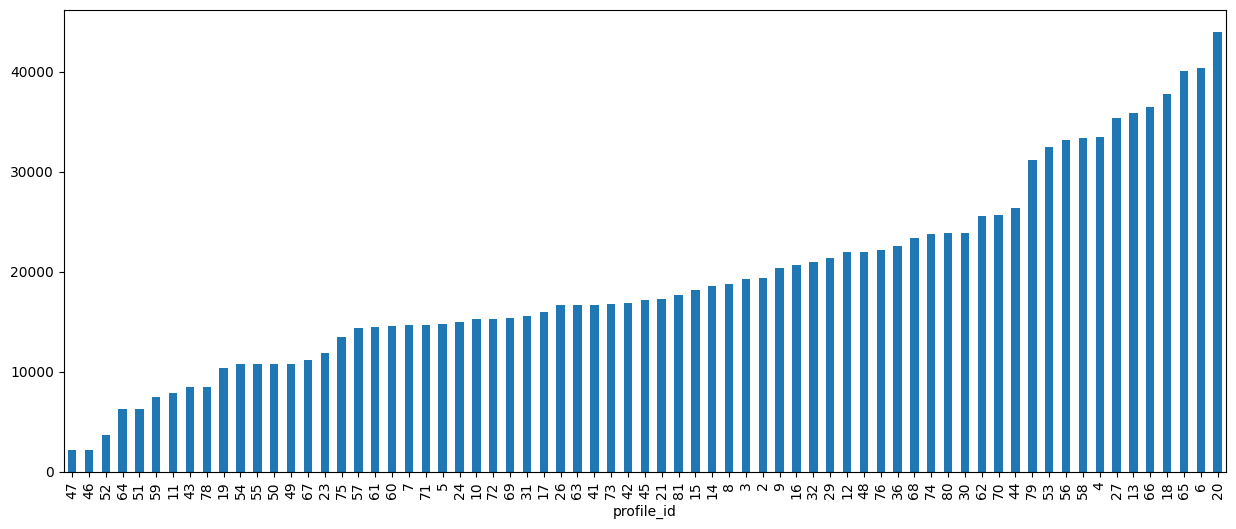

In [ ]:
#Bar Graph
plt.figure(figsize=(15,6))
df['profile_id'].value_counts().sort_values().plot(kind = 'bar')

#session ids 65, 6, and 20 have the most number of measurements recorded.

In [ ]:
df.columns

Index(['u_q', 'coolant', 'stator_winding', 'u_d', 'stator_tooth',
       'motor_speed', 'i_d', 'i_q', 'pm', 'stator_yoke', 'ambient', 'torque',
       'profile_id'],
      dtype='object')

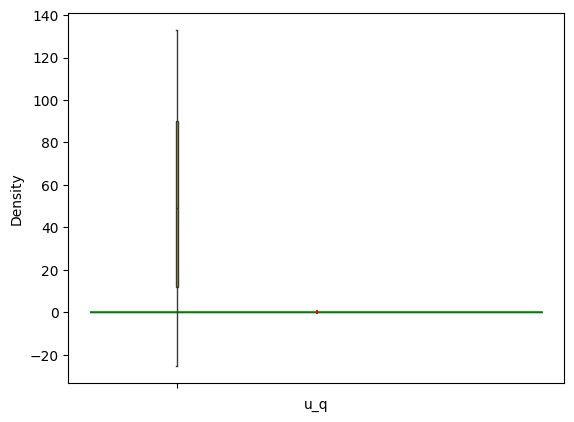

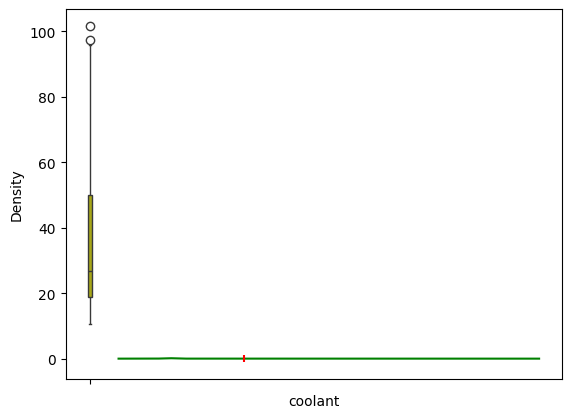

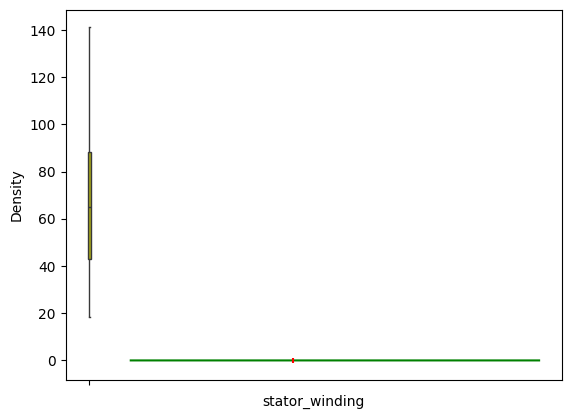

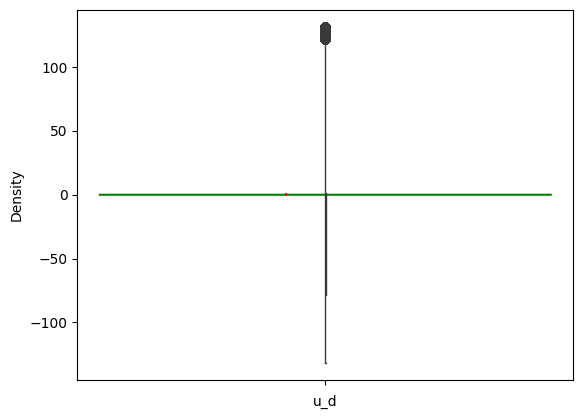

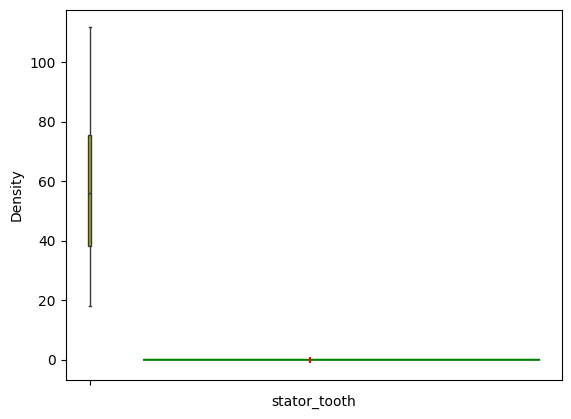

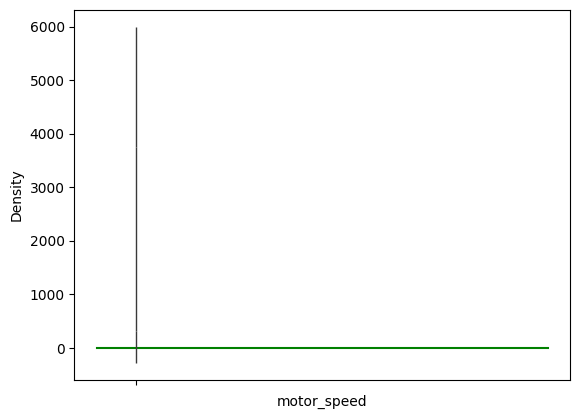

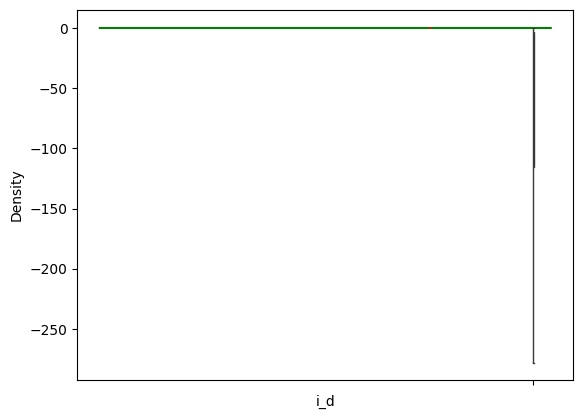

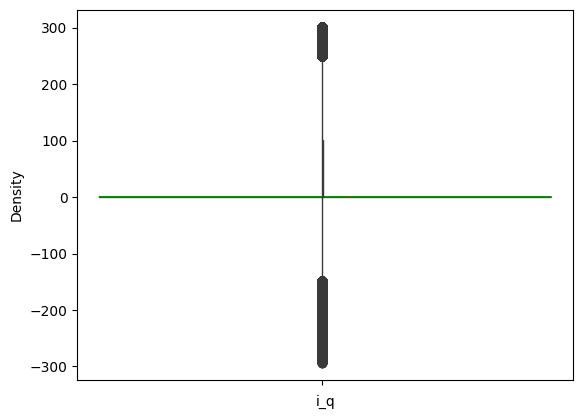

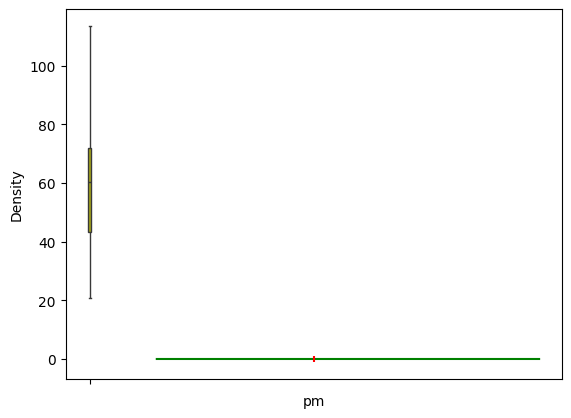

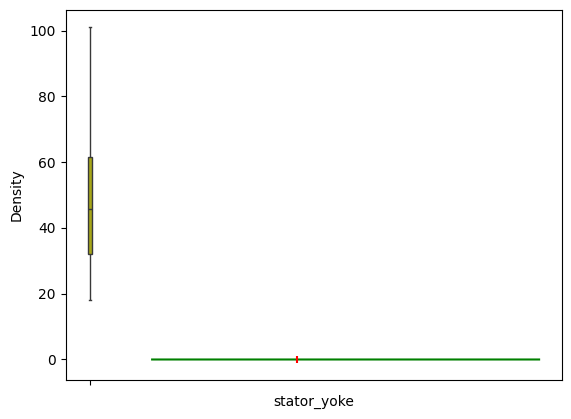

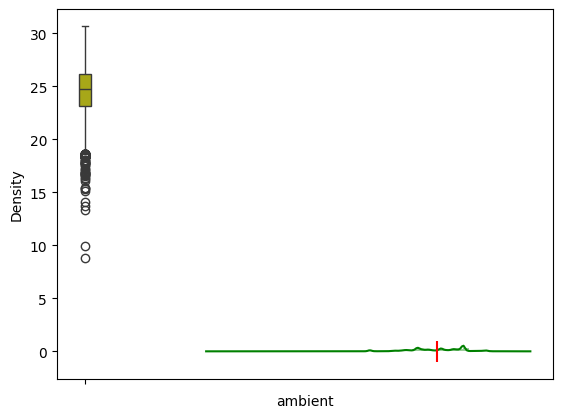

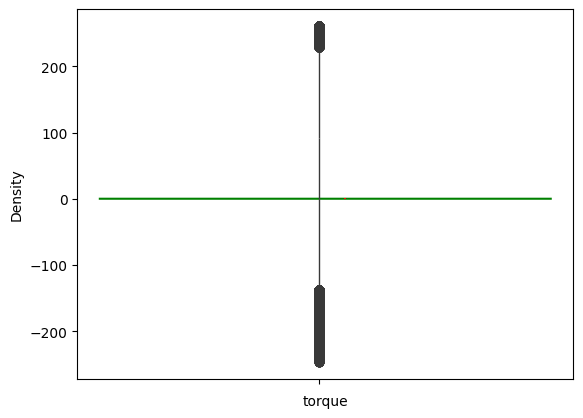

In [ ]:
#Plotting Distribution and Boxplot for all the features to check for skewness

for i in df.columns:
  if i != 'profile_id':
   sns.distplot(df[i],color='g')
   sns.boxplot(df[i], color = 'y')
   plt.vlines(df[i].mean(),ymin = -1,ymax = 1, color = 'r')#drawing the mean Line
   plt.show()

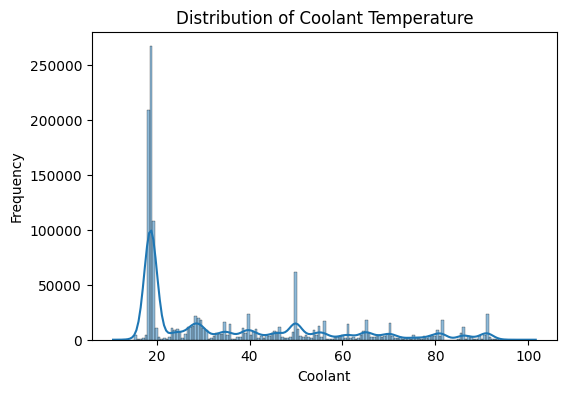

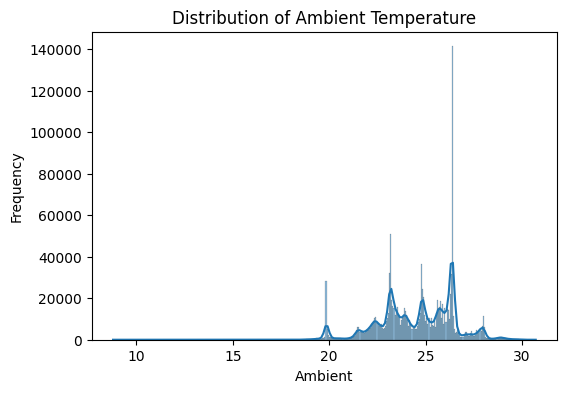

In [ ]:
# Coolant Distribution
plt.figure(figsize=(6,4))
sns.histplot(df['coolant'], kde=True)
plt.title("Distribution of Coolant Temperature")
plt.xlabel("Coolant")
plt.ylabel("Frequency")
plt.show()

# Ambient Distribution
plt.figure(figsize=(6,4))
sns.histplot(df['ambient'], kde=True)
plt.title("Distribution of Ambient Temperature")
plt.xlabel("Ambient")
plt.ylabel("Frequency")
plt.show()

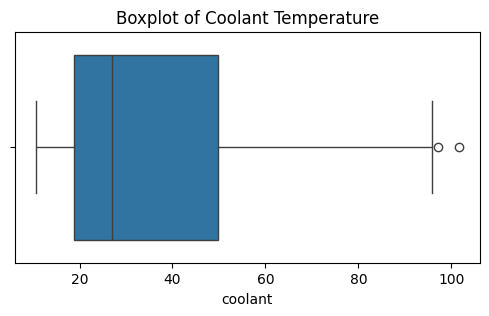

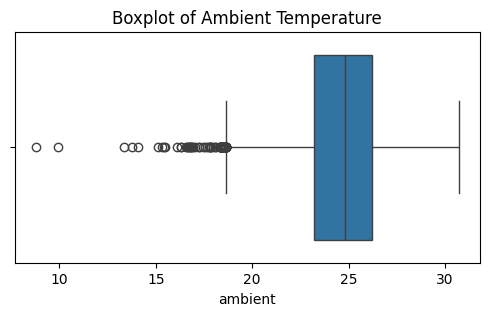

In [ ]:
# Coolant Boxplot
plt.figure(figsize=(6,3))
sns.boxplot(x=df['coolant'])
plt.title("Boxplot of Coolant Temperature")
plt.show()

# Ambient Boxplot
plt.figure(figsize=(6,3))
sns.boxplot(x=df['ambient'])
plt.title("Boxplot of Ambient Temperature")
plt.show()

In [ ]:
df.skew()

,0
u_q,0.314933
coolant,1.048115
stator_winding,0.167666
u_d,0.145061
stator_tooth,0.137610
motor_speed,0.386464
i_d,-0.707305
i_q,-0.146505
pm,0.038312
stator_yoke,0.481009


In [ ]:
#Multi-Variate Analysis

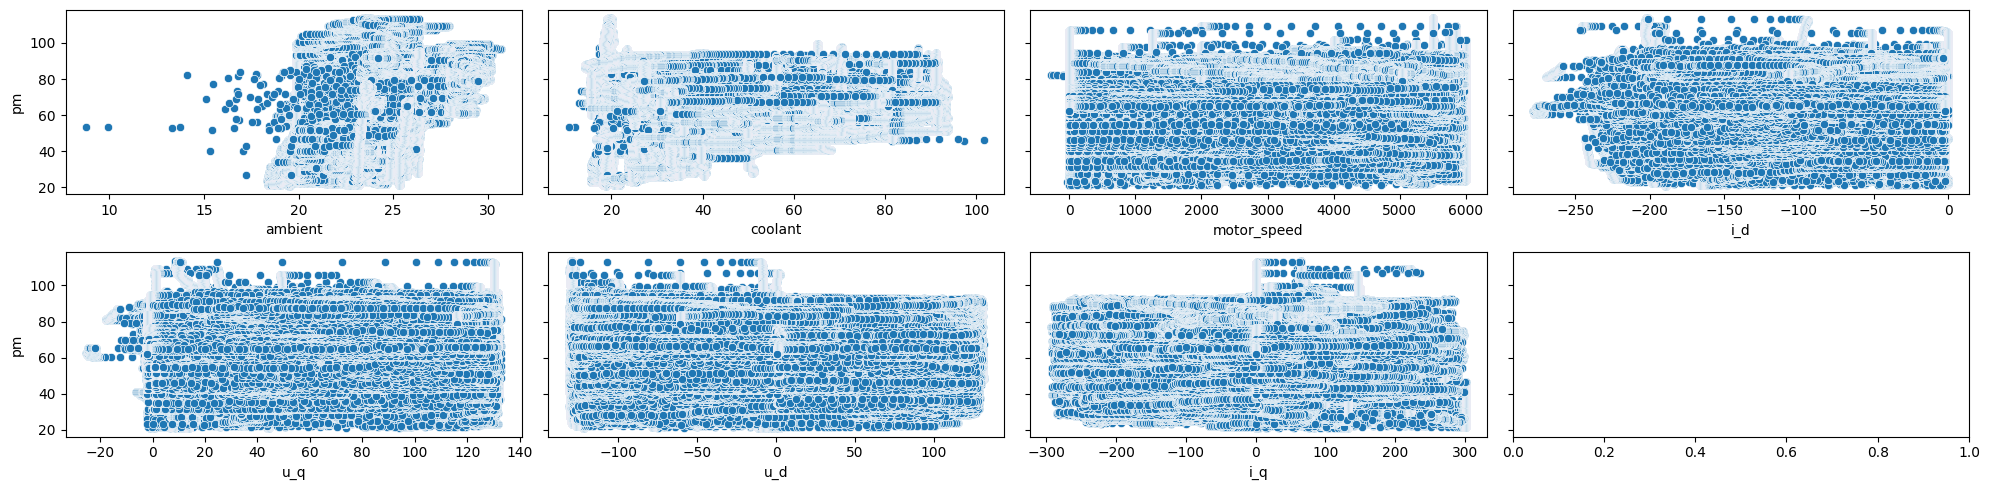

In [ ]:
#Scatter Plot
fig, axes = plt.subplots(2, 4, figsize=(20,5), sharey=True)

sns.scatterplot(x=df['ambient'], y=df['pm'], ax=axes[0][0])
sns.scatterplot(x=df['coolant'], y=df['pm'], ax=axes[0][1])
sns.scatterplot(x=df['motor_speed'], y=df['pm'], ax=axes[0][2])
sns.scatterplot(x=df['i_d'], y=df['pm'], ax=axes[0][3])

sns.scatterplot(x=df['u_q'], y=df['pm'], ax=axes[1][0])
sns.scatterplot(x=df['u_d'], y=df['pm'], ax=axes[1][1])
sns.scatterplot(x=df['i_q'], y=df['pm'], ax=axes[1][2])

plt.tight_layout()
plt.show()

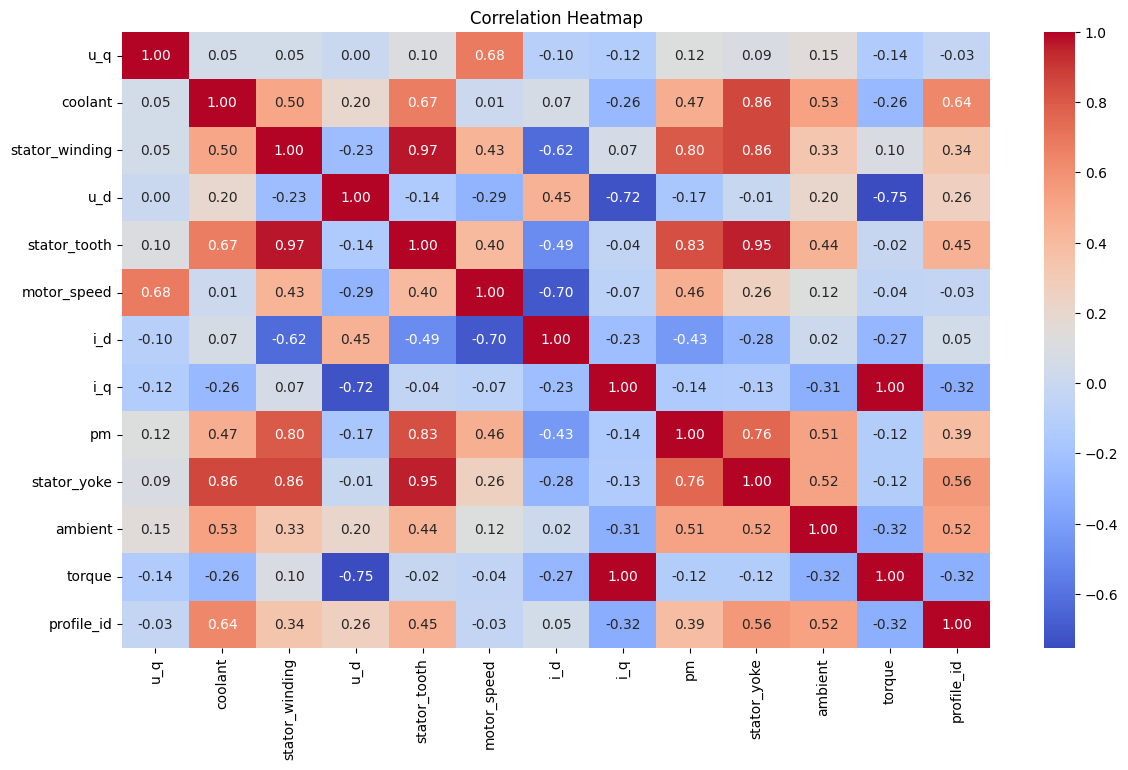

In [ ]:
#HeatMap
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

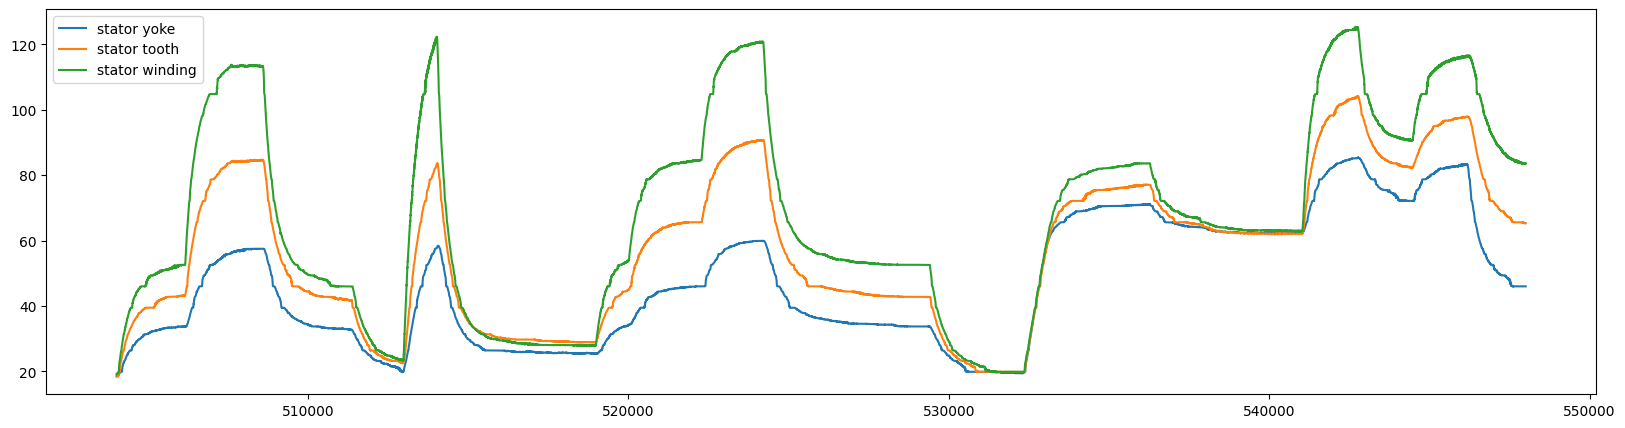

In [ ]:
#For a random measurement,we can try to compare the temperatures of the 3 stator components
plt.figure(figsize=(20,5))
df[df['profile_id'] == 20]['stator_yoke'].plot(label = 'stator yoke')
df[df['profile_id'] == 20] ['stator_tooth'].plot(label = 'stator tooth')
df[df['profile_id'] == 20] ['stator_winding'].plot(label = 'stator winding')
plt.legend();

In [ ]:
df.drop(columns=['profile_id'], errors='ignore', inplace=True)

In [ ]:
#Descriptive Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330816 entries, 0 to 1330815
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   u_q             1330816 non-null  float64
 1   coolant         1330816 non-null  float64
 2   stator_winding  1330816 non-null  float64
 3   u_d             1330816 non-null  float64
 4   stator_tooth    1330816 non-null  float64
 5   motor_speed     1330816 non-null  float64
 6   i_d             1330816 non-null  float64
 7   i_q             1330816 non-null  float64
 8   pm              1330816 non-null  float64
 9   stator_yoke     1330816 non-null  float64
 10  ambient         1330816 non-null  float64
 11  torque          1330816 non-null  float64
dtypes: float64(12)
memory usage: 121.8 MB


In [ ]:
df.describe()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque
count,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06
mean,5.427900e+01,3.622999e+01,6.634275e+01,-2.513381e+01,5.687858e+01,2.202081e+03,-6.871681e+01,3.741278e+01,5.850678e+01,4.818796e+01,2.456526e+01,3.110603e+01
std,4.417323e+01,2.178615e+01,2.867206e+01,6.309197e+01,2.295223e+01,1.859663e+03,6.493323e+01,9.218188e+01,1.900150e+01,1.999100e+01,1.929522e+00,7.713575e+01
min,-2.529093e+01,1.062375e+01,1.858582e+01,-1.315304e+02,1.813398e+01,-2.755491e+02,-2.780036e+02,-2.934268e+02,2.085696e+01,1.807669e+01,8.783478e+00,-2.464667e+02
25%,1.206992e+01,1.869814e+01,4.278796e+01,-7.869090e+01,3.841601e+01,3.171107e+02,-1.154061e+02,1.095863e+00,4.315158e+01,3.199033e+01,2.318480e+01,-1.374265e-01
50%,4.893818e+01,2.690014e+01,6.511013e+01,-7.429755e+00,5.603635e+01,1.999977e+03,-5.109376e+01,1.577401e+01,6.026629e+01,4.562551e+01,2.479733e+01,1.086035e+01
75%,9.003439e+01,4.985749e+01,8.814114e+01,1.470271e+00,7.558668e+01,3.760639e+03,-2.979688e+00,1.006121e+02,7.200837e+01,6.146083e+01,2.621702e+01,9.159718e+01
max,1.330370e+02,1.015985e+02,1.413629e+02,1.314698e+02,1.119464e+02,6.000015e+03,5.189670e-02,3.017079e+02,1.136066e+02,1.011480e+02,3.071420e+01,2.610057e+02


In [ ]:
##Data Preprocessing
#Removing unwanted features

df.drop(columns=['stator_yoke', 'stator_tooth', 'stator_winding'], errors='ignore', inplace=True)

In [ ]:
#handling missing values
df.isnull().sum()
#There are no null values

,0
u_q,0
coolant,0
u_d,0
motor_speed,0
i_d,0
i_q,0
pm,0
ambient,0
torque,0


In [ ]:
#Handling Outliers

#Calculate Quartiles
Q1 = df['coolant'].quantile(0.25)
Q3 = df['coolant'].quantile(0.75)
#Calculate IQR
IQR = Q3 - Q1
#Calculate Bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
pd.DataFrame({
    "Q1": [Q1],
    "Q3": [Q3],
    "IQR": [IQR],
    "Lower Bound": [lower_bound],
    "Upper Bound": [upper_bound]
})

,Q1,Q3,IQR,Lower Bound,Upper Bound
0,18.698135,49.857487,31.159352,-28.040892,96.596514


In [ ]:
df[(df['coolant'] < lower_bound) | (df['coolant'] > upper_bound)]

,u_q,coolant,u_d,motor_speed,i_d,i_q,pm,ambient,torque
800832,82.125980,97.195642,102.459011,2900.070198,-83.625257,-117.057873,45.795328,25.798566,-97.826560
800833,82.878907,101.598512,102.004424,2916.693487,-83.234455,-115.650747,45.921872,25.796318,-96.660701


In [ ]:
#Define X and Y
X = df.drop('pm', axis=1)
y = df['pm']

In [ ]:
#Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,     # 20% for testing
    random_state=42
)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)# fit only on training
X_test = scaler.transform(X_test)# transform test only

In [ ]:
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [ ]:
import joblib
joblib.dump(scaler, 'transform.save')

['transform.save']

In [ ]:
#Testing Split
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (1064652, 8)
Testing set shape: (266164, 8)


In [ ]:
from sklearn.linear_model import LinearRegression #importing libraries
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R2 Score:", r2)

RMSE: 11.97882334125935
R2 Score: 0.6027862021855727


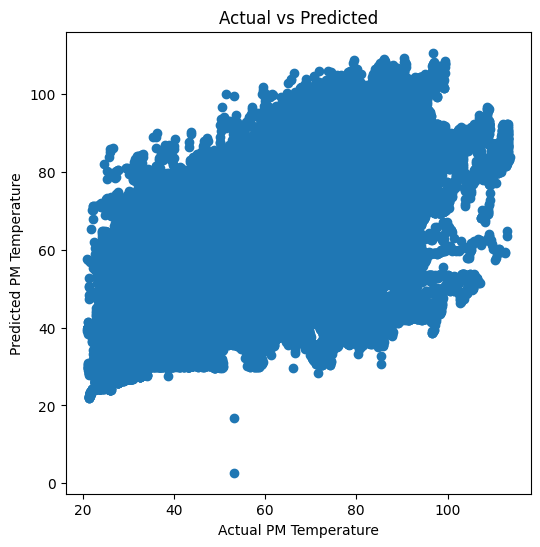

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual PM Temperature")
plt.ylabel("Predicted PM Temperature")
plt.title("Actual vs Predicted")
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor #Decision Tree Model
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [ ]:
dt = DecisionTreeRegressor(
    max_depth=10,        # controls overfitting
    random_state=42
)


In [ ]:
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=42)

In [ ]:
y_pred_dt = dt.predict(X_test)

In [ ]:
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree RMSE:", rmse_dt)
print("Decision Tree R2 Score:", r2_dt)

Decision Tree RMSE: 6.527629757892096
Decision Tree R2 Score: 0.8820475318750596


In [ ]:
print("Training R2:", dt.score(X_train, y_train))
print("Testing R2:", dt.score(X_test, y_test))

Training R2: 0.8835330616909933
Testing R2: 0.8820475318750596


In [ ]:
feature_importance = pd.Series(dt.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False)

,0
coolant,0.372960
motor_speed,0.163057
ambient,0.137162
i_d,0.125749
u_d,0.080961
u_q,0.052760
torque,0.038195
i_q,0.029157


In [ ]:
from sklearn.ensemble import RandomForestRegressor #Random Forest Model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
rf = RandomForestRegressor(
    n_estimators=100,      # number of trees
    max_depth=12,          # controls complexity
    random_state=42,
    n_jobs=-1              # use all CPU cores
)

In [ ]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=12, n_jobs=-1, random_state=42)

In [ ]:
y_pred_rf = rf.predict(X_test)

In [ ]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest RMSE:", rmse_rf)
print("Random Forest R2 Score:", r2_rf)

Random Forest RMSE: 4.82072468375481
Random Forest R2 Score: 0.9356689464281561


In [ ]:
print("Training R2:", rf.score(X_train, y_train))
print("Testing R2:", rf.score(X_test, y_test))

Training R2: 0.9374590937447912
Testing R2: 0.935668946428156


In [ ]:
feature_importance_rf = pd.Series(rf.feature_importances_, index=X.columns)
feature_importance_rf.sort_values(ascending=False)

,0
coolant,0.371873
motor_speed,0.159059
ambient,0.136079
i_d,0.123176
u_d,0.082986
u_q,0.058032
torque,0.036246
i_q,0.032549


In [ ]:
#Compare The Model
print("Linear Regression R2:", r2)
print("Decision Tree R2:", r2_dt)
print("Random Forest R2:", r2_rf)

Linear Regression R2: 0.6027862021855727
Decision Tree R2: 0.8820475318750596
Random Forest R2: 0.9356689464281561


In [ ]:
#Random Forest gives the highest R2 score and lowest RMSE, so it is selected as the final model.

In [ ]:
#Support Vector Regression was considered. However, due to the large dataset size and superior performance of Random Forest, SVR was not selected as the final model.

In [ ]:
#Evaluating Performance Of The Model
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred_rf = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_rf)

print("Random Forest RMSE:", rmse)
print("Random Forest R2 Score:", r2)

Random Forest RMSE: 4.82072468375481
Random Forest R2 Score: 0.9356689464281561


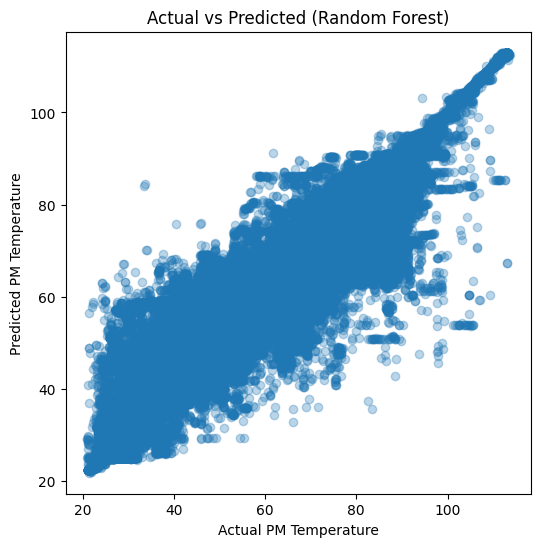

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf, alpha=0.3)
plt.xlabel("Actual PM Temperature")
plt.ylabel("Predicted PM Temperature")
plt.title("Actual vs Predicted (Random Forest)")
plt.show()

In [ ]:
#Saving model and transformation
import joblib

# Save model
joblib.dump(rf, "model.save")

# Save scaler
joblib.dump(scaler, "transform.save")

print("Model and Scaler saved successfully.")

Model and Scaler saved successfully.
